In [775]:
def list_random(min, max):
    alphabet = ['a','b','c','d','e','f','g','h']#,'i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    #shuffle(alphabet)
    my_list = []
    for i in alphabet:
        for j in alphabet:
            if i != j:
                my_list.append((i, j, random.randint(min,max)))
    return my_list

Lista dos caminhos: 
 
('f', 'b', 18)
('g', 'a', 7)
('c', 'b', 25)
('d', 'h', 34)
('g', 'd', 10)
('f', 'a', 16)
('f', 'd', 28)
('h', 'c', 8)
('b', 'e', 45)
('d', 'b', 3)
('e', 'g', 5)
('e', 'h', 30)
('g', 'h', 8)
('f', 'h', 19)
('f', 'g', 42)

('Origem: ', 'f')
('Destino: ', 'g')
 
Distancia Final: 42
 
Caminhos percorridos
 Caminho: ('f', 'g') distancia 42


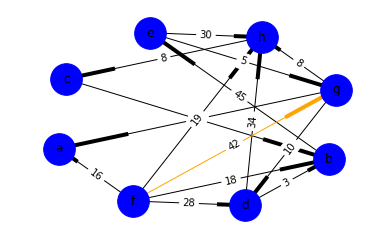

In [818]:
from collections import deque, namedtuple
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

inf = float('inf')
Edge = namedtuple('Edge', 'start, end, cost')


def make_edge(start, end, cost=1):
    return Edge(start, end, cost)


class Graph:
    def __init__(self, edges):
        # let's check that the data is right
        wrong_edges = [i for i in edges if len(i) not in [2, 3]]
        if wrong_edges:
            raise ValueError('Wrong edges data: {}'.format(wrong_edges))

        self.edges = [make_edge(*edge) for edge in edges]

    @property
    def vertices(self):
        return set(
            sum(
                ([edge.start, edge.end] for edge in self.edges), []
            )
        )

    def get_node_pairs(self, n1, n2, both_ends=True):
        if both_ends:
            node_pairs = [[n1, n2], [n2, n1]]
        else:
            node_pairs = [[n1, n2]]
        return node_pairs

    def remove_edge(self, n1, n2, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        edges = self.edges[:]
        for edge in edges:
            if [edge.start, edge.end] in node_pairs:
                self.edges.remove(edge)

    def add_edge(self, n1, n2, cost=1, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        for edge in self.edges:
            if [edge.start, edge.end] in node_pairs:
                return ValueError('Edge {} {} already exists'.format(n1, n2))

        self.edges.append(Edge(start=n1, end=n2, cost=cost))
        if both_ends:
            self.edges.append(Edge(start=n2, end=n1, cost=cost))

    @property
    def neighbours(self):
        neighbours = {vertex: set() for vertex in self.vertices}
        for edge in self.edges:
            neighbours[edge.start].add((edge.end, edge.cost))

        return neighbours

    def dijkstra(self, source, dest):
        assert source in self.vertices, 'Such source node doesn\'t exist'
        distances = {vertex: inf for vertex in self.vertices}
        previous_vertices = {
            vertex: None for vertex in self.vertices
        }
        distances[source] = 0
        vertices = self.vertices.copy()

        while vertices:
            current_vertex = min(
                vertices, key=lambda vertex: distances[vertex])
            vertices.remove(current_vertex)
            if distances[current_vertex] == inf:
                break
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    previous_vertices[neighbour] = current_vertex

        path, current_vertex = deque(), dest
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        if path:
            path.appendleft(current_vertex)
        return path

primary_list = []

primary_list = list_random(1,50)

shuffle(primary_list)

my_list = primary_list[0:15]

graph = Graph(my_list)

shuffle(my_list)

Origin = my_list[0][0]
destiny = my_list[1][0]

best_path = graph.dijkstra(Origin, destiny)

print("Lista dos caminhos: ")
print(" ")

for i in my_list:
    print(i)

print("")

print ("Origem: ", Origin)
print ("Destino: ", destiny)

print(" ")

G = nx.DiGraph()

for i in my_list:
    G.add_edges_from([ (i[0],i[1]) ], weight=i[2])

peso_no = []

size = 0
for i in range(len(best_path) - 1):
    Origin = best_path[i]
    destiny = best_path[i+1]
    for j in my_list:
        if((Origin == j[0]) and (destiny == j[1])):
            peso_no.append(j[2])
            size += j[2]

if(size != 0):
    print("Distancia Final: %d"%(size))
else:
    print("Nao eh possivel chegar ao destino")

j = 0

red_edges = []

for j in range(0,len(best_path) - 1):
    aux = ()
    aux += (best_path[j],)
    aux += (best_path[j + 1],)
    red_edges.append(aux)
    
j = 0
if(size != 0):
    print(" ")
    print("Caminhos percorridos")
    for i in red_edges:
        print(" Caminho: {} distancia {}".format(i,peso_no[j]))
        j+= 1

val_map = {'A': 1.0, 'D': 0.5714285714285714, 'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

edge_colors = ['black' if not edge in red_edges else 'orange' for edge in G.edges()]

color_map = []

color_map.append('blue')



pos=nx.spring_layout(G,k=150,iterations=3000)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = color_map, node_size=1000,edge_color=edge_colors,edge_cmap=plt.cm.Reds, with_labels=True)
pylab.show()
